##(2) Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.

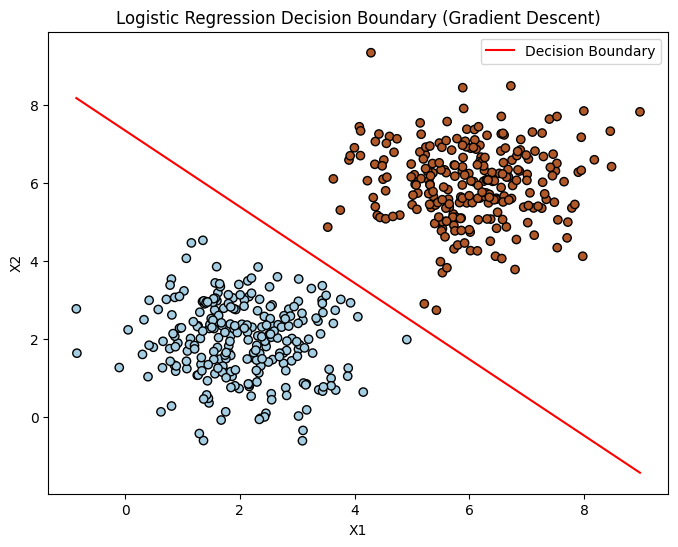

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Logistic_regression_ls.csv')

# Separate features (X) and target variable (y)
X = data[['x1', 'x2']].values
y = data['label'].values

# Add intercept term to X
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression
def cost_function(w, X, y):
    m = len(y)
    h = sigmoid(X.dot(w))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Define the gradient of the cost function
def gradient(w, X, y):
    m = len(y)
    h = sigmoid(X.dot(w))
    grad = (1/m) * X.T.dot(h - y)
    return grad

# Initialize w
initial_w = np.zeros(X.shape[1])

# Define gradient descent function
def gradient_descent(X, y, w, alpha, num_iters):
    J_history = []
    for _ in range(num_iters):
        w -= alpha * gradient(w, X, y)
        J_history.append(cost_function(w, X, y))
    return w, J_history

# Set hyperparameters
alpha = 0.01
num_iters = 10000

# Run gradient descent to obtain the optimal w
w_optimized, J_history = gradient_descent(X, y, initial_w, alpha, num_iters)

# Extract coefficients for the decision boundary (line equation: w0 + w1*x1 + w2*x2 = 0)
# Rearrange: x2 = (-1/w2) * (w0 + w1*x1)
x1_values = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
x2_values = (-1/w_optimized[2]) * (w_optimized[0] + w_optimized[1] * x1_values)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:,1], X[:,2], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(x1_values, x2_values, 'r-', label='Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary (Gradient Descent)')
plt.legend()
plt.show()